In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import (
    KMeans,
)  # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl  # PyLab is a convenience module that bulk imports matplotlib.
from sklearn import preprocessing

## Importing & Slicing

In [180]:
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"

df_mbs_sa3_service_1_np = pd.read_pickle(
    os.path.join(
        path, "clean_datasets/2014-22_combined_service_1_categories_no_pivot.pkl"
    )
)
df_mbs_sa3_service_1_np.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103592 entries, 0 to 229389
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            103592 non-null  int64  
 1   StateTerritory                  103592 non-null  object 
 2   GeographicCode                  103592 non-null  object 
 3   GeographicAreaName              103592 non-null  object 
 4   GeographicGroup                 103592 non-null  object 
 5   ServiceLevel                    103592 non-null  object 
 6   Service                         103592 non-null  object 
 7   DemographicGroup                103592 non-null  object 
 8   MBS_per_100                     103592 non-null  float64
 9   No_of_patients                  103592 non-null  Int32  
 10  No_of_services                  103592 non-null  Int64  
 11  %_People_had_service            103592 non-null  float64
 12  Services_100_peo

In [181]:
# Calculating medicare rebate per person per year
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] == 0, "MBS_per_person"
] = 0
df_mbs_sa3_service_1_np.loc[
    df_mbs_sa3_service_1_np["No_of_patients"] != 0, "MBS_per_person"
] = (
    df_mbs_sa3_service_1_np["Total_mbs_paid_$"]
    / df_mbs_sa3_service_1_np["No_of_patients"]
)

### Extracting All Person Dataset

In [182]:
df_mbs_sa3_all_person = df_mbs_sa3_service_1_np[
    df_mbs_sa3_service_1_np["Population_demographic"] == "All persons"
]
df_mbs_sa3_all_person.shape

(14860, 53)

In [183]:
df_mbs_sa3_all_person.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [184]:
""" df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[
    [
        "No_of_patients",
        "No_of_services",
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_Pocket",
        "ERP",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
        "negative_income",
        "no_income_or_not_applicable",
        "average_income_$5200",
        "average_income_$13000",
        "average_income_$18200",
        "average_income_$26000",
        "average_income_$36400",
        "average_income_$46800",
        "average_income_$58500",
        "average_income_$71500",
        "average_income_$91000",
        "average_income_$130000",
        "average_income_$169000+",
        "Population",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "%_out_of_pocket_by_$18200",
        "%_out_of_pocket_by_$26000",
        "%_out_of_pocket_by_$36400",
        "%_out_of_pocket_by_$46800",
        "%_out_of_pocket_by_$58500",
        "%_out_of_pocket_by_$71500",
        "%_out_of_pocket_by_$91000",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "MBS_per_person",
    ]
] """

In [230]:
df_mbs_sa3_numerical_val = df_mbs_sa3_all_person[
    [
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
    ]
]

## All Personal Data Slice

### Data Standardization

Used sklearnt normalized function to standardize the numbers

In [231]:
d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df)

       Total_mbs_paid_$  Total_provider_fees_$  Out_of_pocket_cost_per_person  \
0              0.002125               0.002297                       0.003211   
1              0.004652               0.005443                       0.009911   
2              0.011536               0.013081                       0.007915   
3              0.000047               0.000042                       0.000054   
4              0.003020               0.004288                       0.015044   
...                 ...                    ...                            ...   
14855          0.001261               0.001415                       0.003879   
14856          0.004213               0.004499                       0.009124   
14857          0.008924               0.009286                       0.006259   
14858          0.000180               0.000205                       0.001496   
14859          0.001724               0.002483                       0.014754   

       No_of_service_per_pe

### The elbow technique

In [232]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [233]:
score = [
    kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-2.5308496308019883,
 -1.6237379942732413,
 -0.8398397690622852,
 -0.5892071285618269,
 -0.47508741050793196,
 -0.4001135960222524,
 -0.3342233184989508,
 -0.2912164864822717,
 -0.26390857771355525]

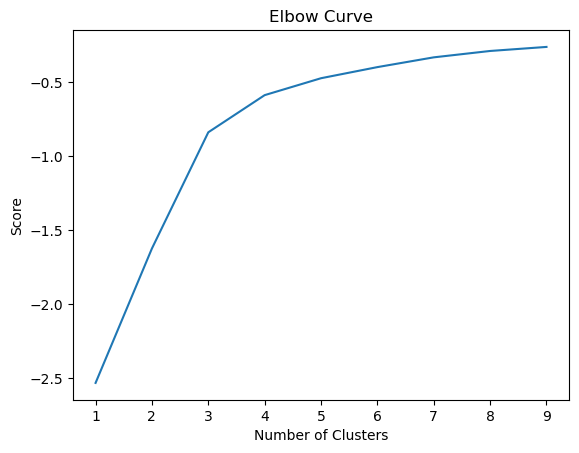

In [234]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

### k-means clustering

In [235]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [238]:
scaled_df["clusters"] = kmeans.fit_predict(scaled_df)

In [239]:
scaled_df.head()

,Total_mbs_paid_$,Total_provider_fees_$,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,clusters
0,0.002125,0.002297,0.003211,0.004024,0.005073,2
1,0.004652,0.005443,0.009911,0.004593,0.013716,1
2,0.011536,0.013081,0.007915,0.011973,0.004202,0
3,0.000047,0.000042,0.000054,0.003488,0.000098,2
4,0.003020,0.004288,0.015044,0.005612,0.017040,1


In [240]:
scaled_df["clusters"].value_counts()

2    9229
1    3390
0    2241
Name: clusters, dtype: int64

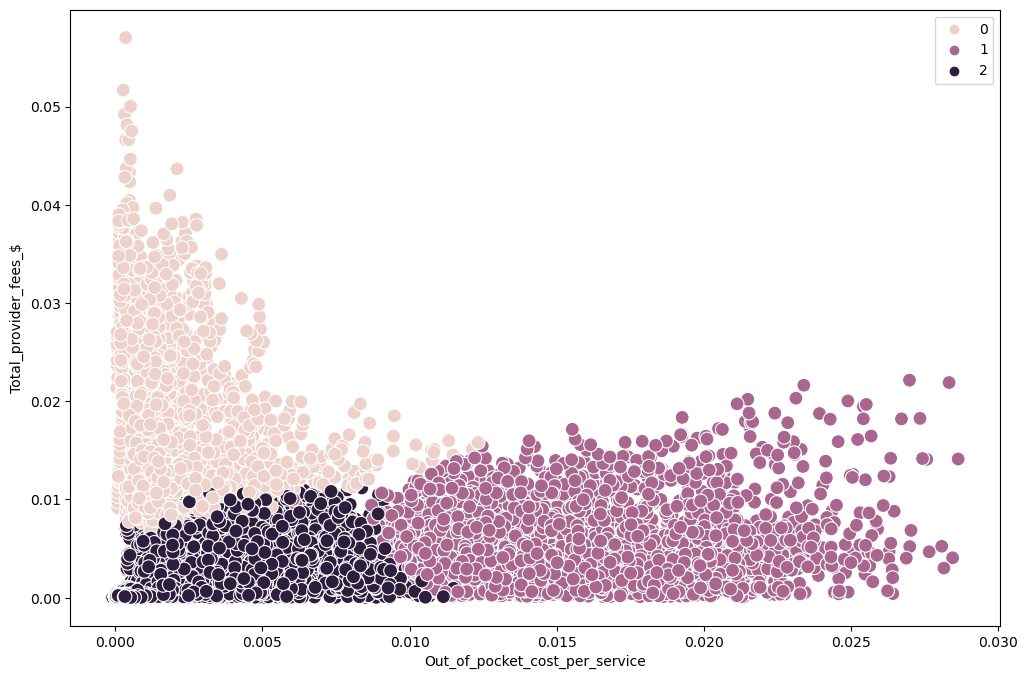

In [243]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=scaled_df["Out_of_pocket_cost_per_service"],
    y=scaled_df["Total_provider_fees_$"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Out_of_pocket_cost_per_service")  # Label x-axis.
plt.ylabel("Total_provider_fees_$")  # Label y-axis.
plt.show()

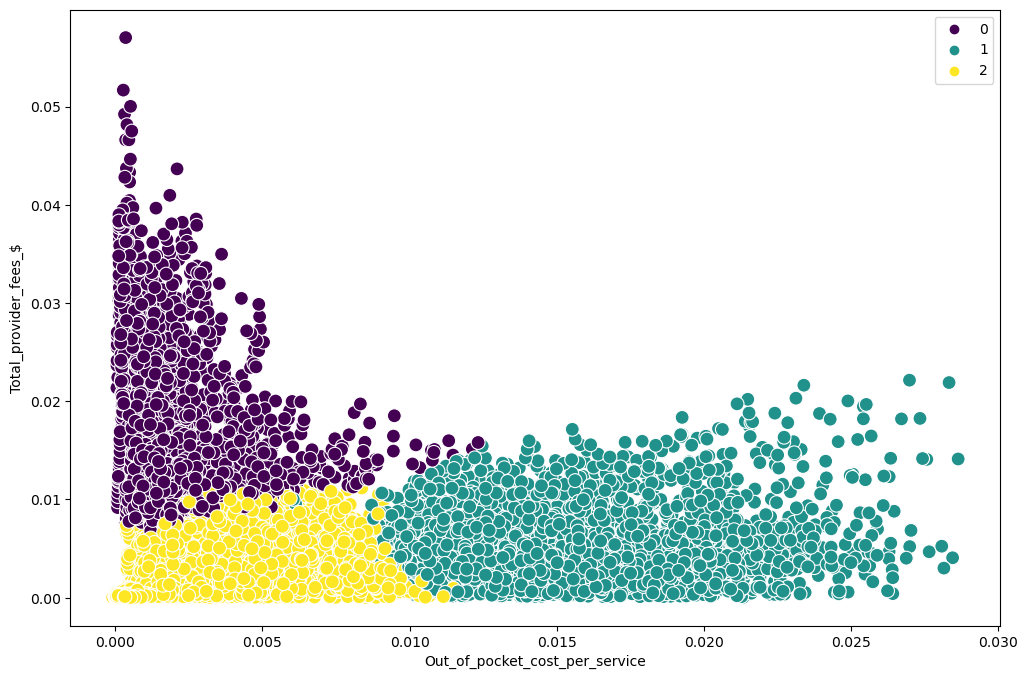

In [249]:
# Define the cluster labels you want to keep
clusters_to_keep = [0, 1, 2]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = scaled_df[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["Out_of_pocket_cost_per_service"],
    y=filtered_df["Total_provider_fees_$"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("Out_of_pocket_cost_per_service")  # Label x-axis.
plt.ylabel("Total_provider_fees_$")  # Label y-axis.
plt.show()

No obvious clusters

In [195]:
df_mbs_sa3_service_1_np["Population_demographic"].unique()

array(['0-24', '25-44', '45-64', '65+', 'All persons', 'Females', 'Males'],
      dtype=object)

## Gender Data Slice

### Extract 2022 All person data

In [196]:
df_mbs_sa3_gender = df_mbs_sa3_service_1_np[
    (df_mbs_sa3_service_1_np["Population_demographic"].isin(["Females", "Males"]))
]
df_mbs_sa3_gender.shape

(29715, 53)

In [197]:
df_mbs_sa3_gender.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [198]:
df_mbs_sa3_numerical_val = df_mbs_sa3_gender[
    [
        "No_of_patients",
        "No_of_services",
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_Pocket",
        "ERP",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
        "negative_income",
        "no_income_or_not_applicable",
        "average_income_$5200",
        "average_income_$13000",
        "average_income_$18200",
        "average_income_$26000",
        "average_income_$36400",
        "average_income_$46800",
        "average_income_$58500",
        "average_income_$71500",
        "average_income_$91000",
        "average_income_$130000",
        "average_income_$169000+",
        "Population",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "%_out_of_pocket_by_$18200",
        "%_out_of_pocket_by_$26000",
        "%_out_of_pocket_by_$36400",
        "%_out_of_pocket_by_$46800",
        "%_out_of_pocket_by_$58500",
        "%_out_of_pocket_by_$71500",
        "%_out_of_pocket_by_$91000",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "MBS_per_person",
    ]
]

### Data Standardization

Used sklearnt normalized function to standardize the numbers

In [199]:
d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df)

       No_of_patients  No_of_services  Total_mbs_paid_$  \
0            0.004662        0.001463          0.001881   
1            0.003195        0.000882          0.001088   
2            0.004927        0.001773          0.003946   
3            0.003251        0.001015          0.002553   
4            0.011824        0.011519          0.009549   
...               ...             ...               ...   
29710        0.006503        0.005889          0.005478   
29711        0.001050        0.000315          0.000169   
29712        0.000807        0.000212          0.000082   
29713        0.002072        0.000828          0.001261   
29714        0.001935        0.000764          0.001148   

       Total_provider_fees_$  Out_of_Pocket       ERP  \
0                   0.002048       0.002430  0.006415   
1                   0.001158       0.001234  0.006338   
2                   0.004759       0.008097  0.006415   
3                   0.002838       0.003674  0.006338   
4     

### The elbow technique

In [200]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [201]:
score = [
    kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-15.766095301223151,
 -10.356975165782817,
 -7.409932015493631,
 -6.39322678431307,
 -5.515507151384539,
 -4.873889210351289,
 -4.48375558985628,
 -4.116043293469883,
 -3.7922949228902447]

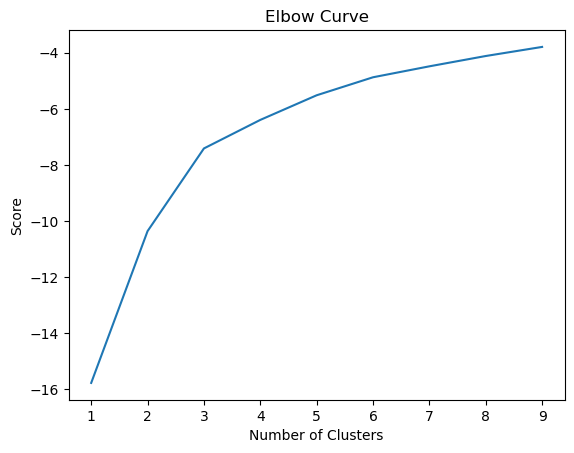

In [202]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

### k-means clustering

In [203]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [204]:
scaled_df["clusters"] = kmeans.fit_predict(scaled_df)

In [205]:
scaled_df.head()

,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,negative_income,...,%_out_of_pocket_by_$26000,%_out_of_pocket_by_$36400,%_out_of_pocket_by_$46800,%_out_of_pocket_by_$58500,%_out_of_pocket_by_$71500,%_out_of_pocket_by_$91000,%_out_of_pocket_by_$130000,%_out_of_pocket_by_$169000+,MBS_per_person,clusters
0,0.004662,0.001463,0.001881,0.002048,0.002430,0.006415,0.002544,0.002995,0.003826,0.003608,...,0.002550,0.002537,0.002542,0.002561,0.002550,0.002508,0.002529,0.002603,0.003088,2
1,0.003195,0.000882,0.001088,0.001158,0.001234,0.006338,0.001886,0.002635,0.003223,0.003608,...,0.001876,0.001888,0.001897,0.001897,0.001913,0.001918,0.001897,0.001918,0.002606,2
2,0.004927,0.001773,0.003946,0.004759,0.008097,0.006415,0.008022,0.003433,0.010526,0.003608,...,0.008030,0.008025,0.008004,0.008014,0.007998,0.008040,0.008009,0.008083,0.006131,1
3,0.003251,0.001015,0.002553,0.002838,0.003674,0.006338,0.005515,0.002977,0.008344,0.003608,...,0.005522,0.005518,0.005501,0.005501,0.005506,0.005532,0.005480,0.005480,0.006010,2
4,0.011824,0.011519,0.009549,0.010877,0.015447,0.006415,0.006377,0.009295,0.003090,0.003608,...,0.006386,0.006373,0.006373,0.006354,0.006375,0.006344,0.006428,0.006439,0.006181,0


In [206]:
scaled_df["clusters"].value_counts()

2    17854
1     6212
0     5649
Name: clusters, dtype: int64

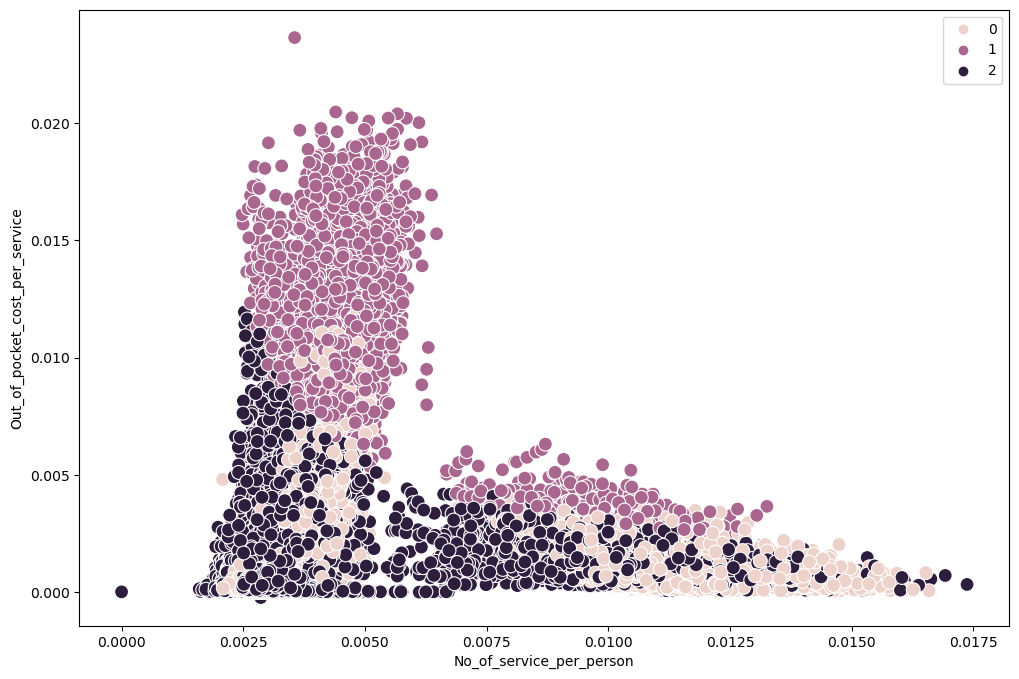

In [207]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=scaled_df["No_of_service_per_person"],
    y=scaled_df["Out_of_pocket_cost_per_service"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_service")  # Label y-axis.
plt.show()

## GP Service Data Slice

### Extract 2022 GP Services

In [208]:
df_mbs_sa3_service_1_np["Service"].unique()

array(['Allied Health attendances (total)', 'Diagnostic Imaging (total)',
       'GP attendances (total)',
       'Nursing and Aboriginal Health Workers (total)',
       'Specialist attendances (total)'], dtype=object)

In [209]:
df_mbs_sa3_all_person_gp = df_mbs_sa3_service_1_np[
    (df_mbs_sa3_service_1_np["Population_demographic"].isin(["All persons"]))
    & (df_mbs_sa3_service_1_np["Service"] == "GP attendances (total)")
]
df_mbs_sa3_all_person_gp.shape

(2972, 53)

In [210]:
df_mbs_sa3_all_person_gp.columns

Index(['Year', 'StateTerritory', 'GeographicCode', 'GeographicAreaName',
       'GeographicGroup', 'ServiceLevel', 'Service', 'DemographicGroup',
       'MBS_per_100', 'No_of_patients', 'No_of_services',
       '%_People_had_service', 'Services_100_people', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'ERP', 'key_x', 'Out_of_Pocket',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_person',
       'No_of_service_per_person', 'Out_of_pocket_cost_per_service',
       'Patient_ERP_Flag', 'negative_income', 'no_income_or_not_applicable',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000',
       'average_income_$169000+', 'Population_demographic', 'Population',
       '%_out_of_pocket_by_$5200', '%_out_of_pocket_by_$13000',
       '%_out_of_pocket_

In [211]:
df_mbs_sa3_numerical_val = df_mbs_sa3_all_person_gp[
    [
        "No_of_patients",
        "No_of_services",
        "Total_mbs_paid_$",
        "Total_provider_fees_$",
        "Out_of_Pocket",
        "ERP",
        "Out_of_pocket_cost_per_person",
        "No_of_service_per_person",
        "Out_of_pocket_cost_per_service",
        "negative_income",
        "no_income_or_not_applicable",
        "average_income_$5200",
        "average_income_$13000",
        "average_income_$18200",
        "average_income_$26000",
        "average_income_$36400",
        "average_income_$46800",
        "average_income_$58500",
        "average_income_$71500",
        "average_income_$91000",
        "average_income_$130000",
        "average_income_$169000+",
        "Population",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "%_out_of_pocket_by_$18200",
        "%_out_of_pocket_by_$26000",
        "%_out_of_pocket_by_$36400",
        "%_out_of_pocket_by_$46800",
        "%_out_of_pocket_by_$58500",
        "%_out_of_pocket_by_$71500",
        "%_out_of_pocket_by_$91000",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "MBS_per_person",
    ]
]

### Data Standardization

Used sklearnt normalized function to standardize the numbers

In [212]:
d = preprocessing.normalize(df_mbs_sa3_numerical_val, axis=0)
scaled_df = pd.DataFrame(d, columns=df_mbs_sa3_numerical_val.columns)
print(scaled_df)

      No_of_patients  No_of_services  Total_mbs_paid_$  Total_provider_fees_$  \
0           0.019144        0.014502          0.013140               0.015405   
1           0.000375        0.000268          0.000249               0.000313   
2           0.011364        0.007815          0.006955               0.008425   
3           0.009054        0.006103          0.005825               0.007437   
4           0.005287        0.003517          0.003289               0.004463   
...              ...             ...               ...                    ...   
2967        0.004804        0.002959          0.003001               0.003558   
2968        0.003216        0.002585          0.002463               0.002759   
2969        0.001675        0.001315          0.001554               0.001562   
2970        0.007282        0.005993          0.006155               0.006301   
2971        0.011528        0.009807          0.010166               0.010936   

      Out_of_Pocket       E

### The elbow technique

In [213]:
num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [
    KMeans(n_clusters=i) for i in num_cl
]  # Defines k-means clusters in the range assigned above.

In [214]:
score = [
    kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))
]  # Creates a score that represents
# a rate of variation for the given cluster option.

score

[-10.178746360408974,
 -6.360965172259014,
 -4.438202911029219,
 -3.696781611004535,
 -3.133727150602665,
 -2.764613396002779,
 -2.528408780726539,
 -2.3149302616278957,
 -2.1312620128899336]

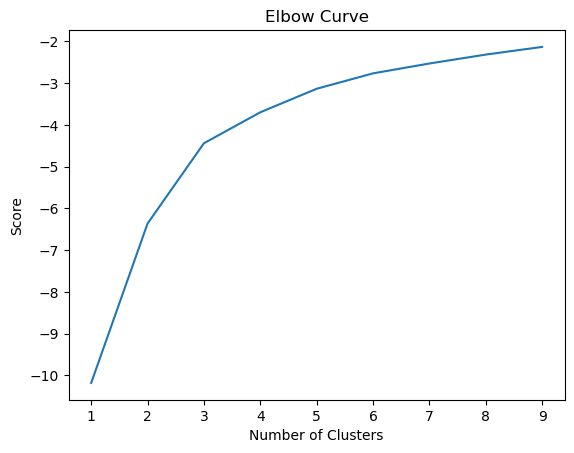

In [215]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl, score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

#####  In this example, there's a large jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

### k-means clustering

In [216]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3)
# Fit the k-means object to the data.

kmeans.fit(df_mbs_sa3_numerical_val)

KMeans(n_clusters=3)

In [217]:
scaled_df["clusters"] = kmeans.fit_predict(scaled_df)

In [218]:
scaled_df.head()

,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_per_service,negative_income,...,%_out_of_pocket_by_$26000,%_out_of_pocket_by_$36400,%_out_of_pocket_by_$46800,%_out_of_pocket_by_$58500,%_out_of_pocket_by_$71500,%_out_of_pocket_by_$91000,%_out_of_pocket_by_$130000,%_out_of_pocket_by_$169000+,MBS_per_person,clusters
0,0.019144,0.014502,0.013140,0.015405,0.033753,0.020168,0.028772,0.014687,0.032215,0.011409,...,0.028747,0.028743,0.028787,0.028694,0.028829,0.028745,0.028637,0.028796,0.013080,0
1,0.000375,0.000268,0.000249,0.000313,0.000854,0.000314,0.037153,0.013876,0.044029,0.000275,...,0.037176,0.037215,0.037150,0.037204,0.037151,0.037065,0.037282,0.037225,0.012648,0
2,0.011364,0.007815,0.006955,0.008425,0.020647,0.012201,0.029649,0.013332,0.036568,0.006373,...,0.029611,0.029651,0.029565,0.029666,0.029721,0.029501,0.029718,0.029499,0.011662,0
3,0.009054,0.006103,0.005825,0.007437,0.021189,0.010830,0.038193,0.013069,0.048057,0.005980,...,0.038149,0.038123,0.038123,0.038177,0.038340,0.038200,0.038363,0.037927,0.012260,0
4,0.005287,0.003517,0.003289,0.004463,0.014654,0.005423,0.045230,0.012898,0.057667,0.002400,...,0.045282,0.045233,0.045320,0.045229,0.045175,0.045386,0.045387,0.044951,0.011853,0


In [219]:
scaled_df["clusters"].value_counts()

2    1819
1     624
0     529
Name: clusters, dtype: int64

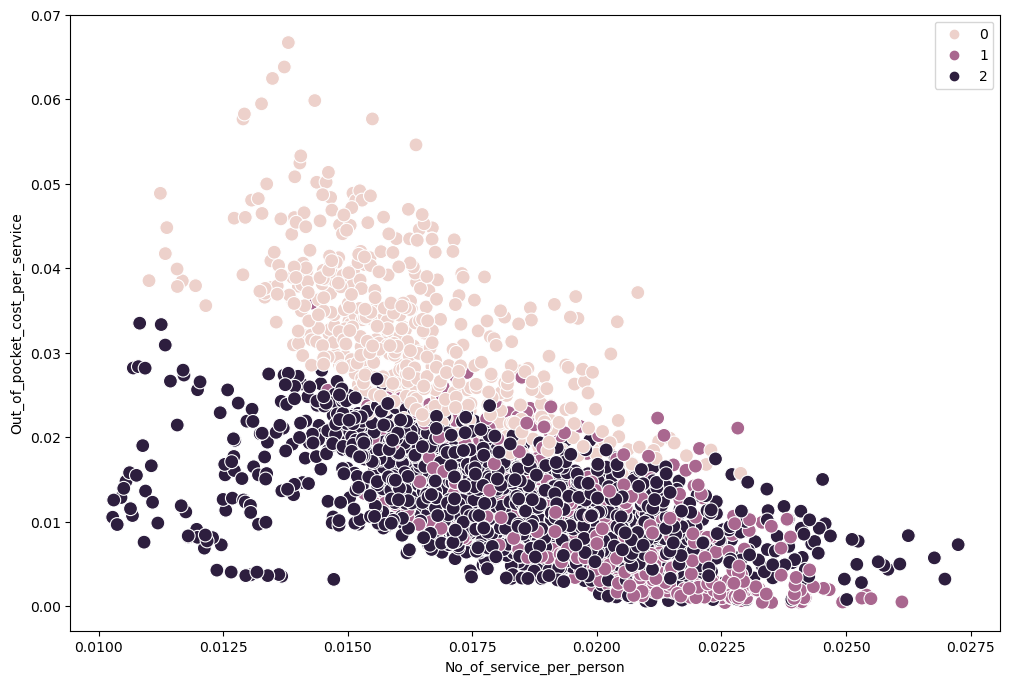

In [220]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=scaled_df["No_of_service_per_person"],
    y=scaled_df["Out_of_pocket_cost_per_service"],
    hue=kmeans.labels_,
    s=100,
)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_service")  # Label y-axis.
plt.show()

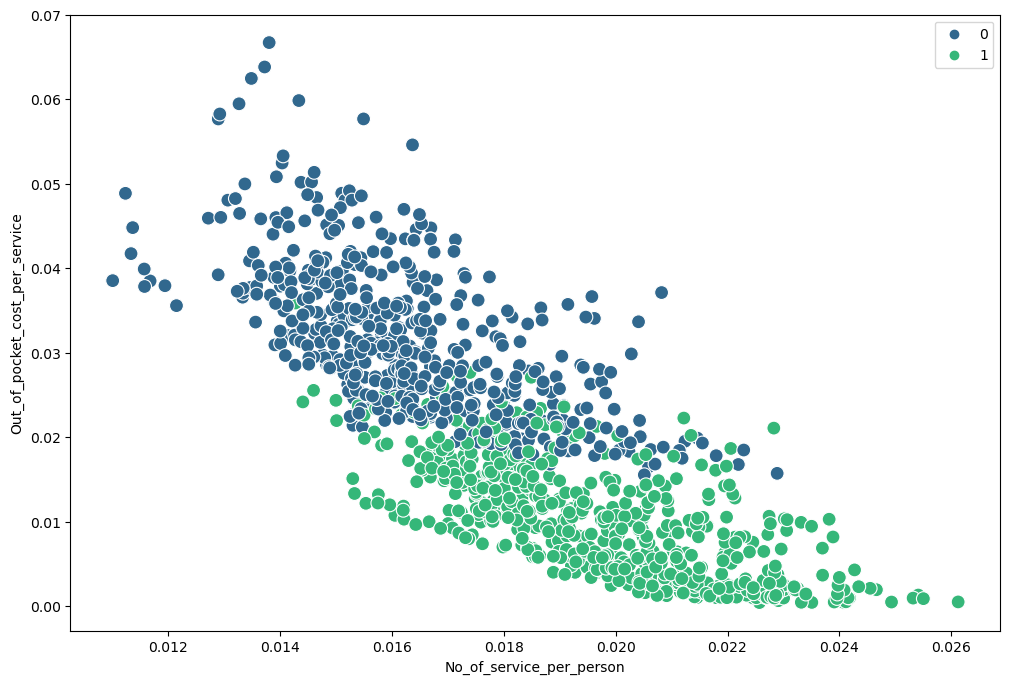

In [229]:
# Define the cluster labels you want to keep
clusters_to_keep = [0, 1]

# Create a mask for rows where the kmeans.labels_ is in clusters_to_keep
mask = [label in clusters_to_keep for label in kmeans.labels_]

# Create a new DataFrame with only the desired clusters
filtered_df = scaled_df[mask]

# Now the kmeans.labels_ also needs to be filtered
filtered_labels = kmeans.labels_[mask]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=filtered_df["No_of_service_per_person"],
    y=filtered_df["Out_of_pocket_cost_per_service"],
    hue=filtered_labels,
    s=100,
    palette="viridis",  # Optionally, specify a color palette for clarity
)

ax.grid(False)  # This removes the grid from the background.
plt.xlabel("No_of_service_per_person")  # Label x-axis.
plt.ylabel("Out_of_pocket_cost_per_service")  # Label y-axis.
plt.show()